In [1]:
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# Data Analysis

In [2]:
df = pd.read_csv("/Users/anishvakalapudi/Desktop/Schema_3.csv")

In [3]:
df.loc[:,"cough"]


0        n
1        n
2        n
3        n
4        n
        ..
15529    n
15530    n
15531    n
15532    n
15533    n
Name: cough, Length: 15534, dtype: object

<AxesSubplot:>

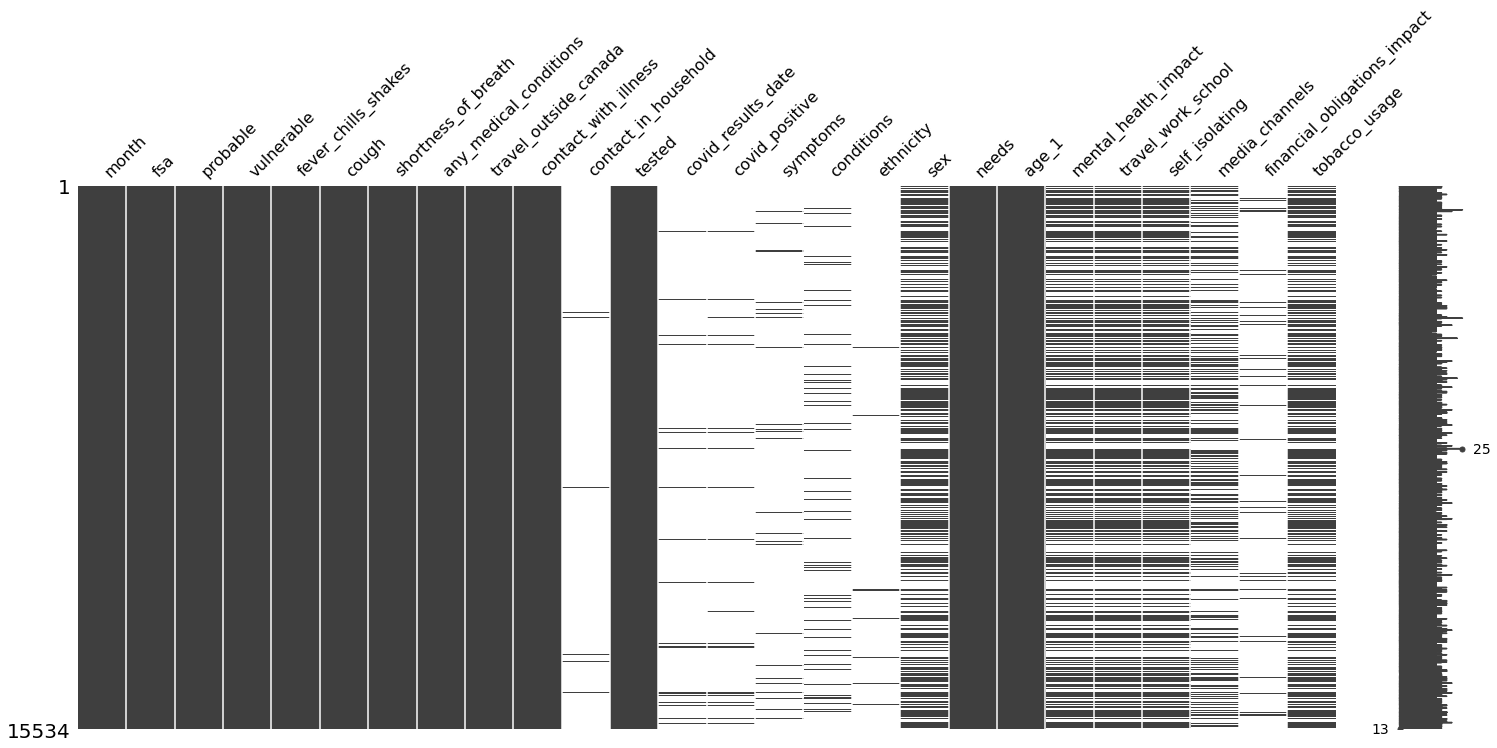

In [4]:
import missingno as msno


msno.matrix(df)

In [5]:
df.fsa.duplicated().sum()


15225

In [6]:
df.isnull().any()

month                           False
fsa                             False
probable                        False
vulnerable                      False
fever_chills_shakes             False
cough                           False
shortness_of_breath             False
any_medical_conditions          False
travel_outside_canada           False
contact_with_illness            False
contact_in_household             True
tested                          False
covid_results_date               True
covid_positive                   True
symptoms                         True
conditions                       True
ethnicity                        True
sex                              True
needs                           False
age_1                           False
mental_health_impact             True
travel_work_school               True
self_isolating                   True
media_channels                   True
financial_obligations_impact     True
tobacco_usage                    True
dtype: bool

In [7]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

contact_in_household            98.98
ethnicity                       98.08
covid_results_date              97.29
covid_positive                  96.85
symptoms                        94.90
financial_obligations_impact    94.10
conditions                      90.80
media_channels                  63.29
tobacco_usage                   44.14
self_isolating                  44.13
travel_work_school              44.12
sex                             44.11
mental_health_impact            44.08
needs                            0.00
probable                         0.00
vulnerable                       0.00
age_1                            0.00
contact_with_illness             0.00
travel_outside_canada            0.00
fever_chills_shakes              0.00
cough                            0.00
shortness_of_breath              0.00
fsa                              0.00
any_medical_conditions           0.00
tested                           0.00
month                            0.00
dtype: float

In [8]:
df.fsa.unique()

array(['M4P', 'M9P', 'K0L', 'N9E', 'L2N', 'M6S', 'M4J', 'M4Y', 'N6J',
       'L4J', 'L1V', 'N0G', 'N5Y', 'M9W', 'M4K', 'M5V', 'M2H', 'M4M',
       'M3A', 'L5N', 'L6R', 'K2G', 'L4Z', 'K7M', 'N1R', 'K1V', 'L4H',
       'M6E', 'M1T', 'K1J', 'M8Z', 'M2J', 'K0G', 'L3C', 'L4C', 'L6M',
       'K8N', 'N2M', 'M3C', 'L6H', 'L5B', 'L6J', 'L0K', 'L8K', 'L4N',
       'N0A', 'L1N', 'M1P', 'P0T', 'L0E', 'L5M', 'L6Z', 'M1S', 'M2N',
       'L4A', 'N0L', 'K1N', 'K0C', 'N0K', 'K0B', 'M4E', 'K0K', 'L6S',
       'M1E', 'P1B', 'M9A', 'L8J', 'M6J', 'L3T', 'K8A', 'L9Z', 'L5G',
       'K9H', 'M6R', 'K2J', 'L1K', 'N5Z', 'K2P', 'L0L', 'P6A', 'L4G',
       'L7G', 'L9B', 'K0E', 'M8Y', 'N3R', 'K7P', 'M5M', 'L0M', 'L9Y',
       'M1B', 'L3M', 'L6C', 'N4G', 'L1T', 'P3E', 'K2K', 'M3H', 'M5A',
       'L6V', 'M4C', 'N5W', 'L6L', 'L2R', 'M1C', 'K1S', 'L6A', 'L4P',
       'L5J', 'M9B', 'L9S', 'L9C', 'N5X', 'L4L', 'M1W', 'M6K', 'L7M',
       'N2E', 'M9V', 'L0S', 'P7B', 'N2K', 'K2S', 'L0R', 'P7C', 'M5R',
       'M4V', 'L5L',

In [9]:
pd.crosstab([df.tobacco_usage],df.probable,margins=True)

probable,n,y,All
tobacco_usage,,,
n,6206,88,6294
quitSmoking,1408,15,1423
y,932,29,961
All,8546,132,8678


In [10]:
df['province'] = df.fsa.str[0]

In [11]:
print(df.province)

0        M
1        M
2        K
3        N
4        L
        ..
15529    M
15530    K
15531    M
15532    M
15533    K
Name: province, Length: 15534, dtype: object


In [12]:
df.head

<bound method NDFrame.head of        month  fsa probable vulnerable fever_chills_shakes cough  \
0      April  M4P        n          n                   n     n   
1      April  M9P        n          n                   n     n   
2      April  K0L        n          n                   n     n   
3      April  N9E        n          n                   n     n   
4      April  L2N        n          n                   n     n   
...      ...  ...      ...        ...                 ...   ...   
15529   July  M6P        n          n                   n     n   
15530   July  K1R        n          n                   n     n   
15531   July  M4M        n          n                   n     n   
15532   July  M6P        n          y                   n     n   
15533   July  K2H        n          n                   n     n   

      shortness_of_breath any_medical_conditions travel_outside_canada  \
0                       n                      y                     n   
1                

In [13]:
df['province'].value_counts()

M    5349
L    5345
K    2463
N    2124
P     253
Name: province, dtype: int64

In [14]:
df['mh'] = df['mental_health_impact'].map(
                   {'positively':1 ,'noImpact':1 ,'negatively':0})
  

In [15]:
df['mh'].values[1]

1.0

In [16]:
pd.crosstab([df.province],df.mh,margins=True)

mh,0.0,1.0,All
province,,,
K,742,760,1502
L,1437,1561,2998
M,1501,1191,2692
N,660,664,1324
P,77,94,171
All,4417,4270,8687


In [17]:
pd.crosstab(df.province, df.mental_health_impact, normalize='index')

mental_health_impact,negatively,noImpact,positively
province,,,
K,0.494008,0.462051,0.043941
L,0.479320,0.487658,0.033022
M,0.557578,0.403046,0.039376
N,0.498489,0.450151,0.051360
P,0.450292,0.497076,0.052632


In [18]:
pd.crosstab(df.province, df.tobacco_usage, normalize='index')

tobacco_usage,n,quitSmoking,y
province,,,
K,0.716378,0.182423,0.101198
L,0.725176,0.153460,0.121364
M,0.741636,0.165056,0.093309
N,0.704683,0.166163,0.129154
P,0.707602,0.152047,0.140351


In [19]:
pd.crosstab(df.province, df.self_isolating, normalize='index')

self_isolating,n,y
province,,
K,0.197071,0.802929
L,0.208152,0.791848
M,0.200743,0.799257
N,0.227513,0.772487
P,0.274854,0.725146


In [20]:
pd.crosstab(df.ethnicity, df.province, normalize='index')

province,K,L,M,N,P
ethnicity,,,,,
black/african;caucasian,0.0,0.214286,0.50,0.285714,0.0
black/african;caucasian;hispanic/latino,0.0,0.000000,1.00,0.000000,0.0
black/african;hispanic/latino,0.0,0.000000,1.00,0.000000,0.0
black/african;other,0.0,0.000000,1.00,0.000000,0.0
black/african;south asian,0.0,0.000000,1.00,0.000000,0.0
...,...,...,...,...,...
south asian;east asian,0.0,0.250000,0.75,0.000000,0.0
south asian;east asian;caucasian,0.0,1.000000,0.00,0.000000,0.0
south asian;other,0.0,0.000000,0.80,0.000000,0.2


In [21]:
pd.crosstab(df.travel_work_school, df.mh, margins=True)

mh,0.0,1.0,All
travel_work_school,,,
alwaysWorkFromHome,284,294,578
didntTravelBefore,1053,1318,2371
non: j'ai toujours travaille de chez moi.,1,0,1
stillTravelEssential,470,452,922
stillTravelNonEssential,90,108,198
stoppedTravelling,2513,2097,4610
All,4411,4269,8680


In [22]:
sns.set_style('darkgrid')

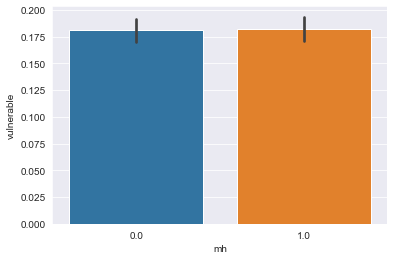

In [96]:
sns.barplot(x = 'mh', y= 'vulnerable', data=df2);

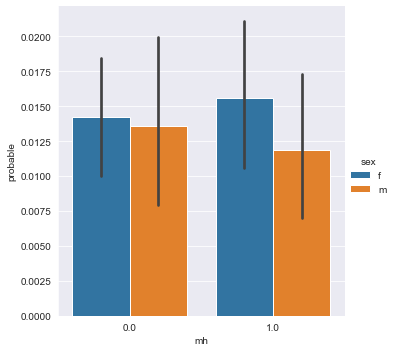

In [97]:
sns.catplot(data=df2, x='mh', y='probable', hue='sex', kind='bar');

In [25]:
df1=df.drop(columns=['contact_in_household', 'covid_results_date', 'covid_positive','symptoms','conditions','ethnicity','financial_obligations_impact', 'media_channels', 'travel_work_school'])

In [26]:
df1.head

<bound method NDFrame.head of        month  fsa probable vulnerable fever_chills_shakes cough  \
0      April  M4P        n          n                   n     n   
1      April  M9P        n          n                   n     n   
2      April  K0L        n          n                   n     n   
3      April  N9E        n          n                   n     n   
4      April  L2N        n          n                   n     n   
...      ...  ...      ...        ...                 ...   ...   
15529   July  M6P        n          n                   n     n   
15530   July  K1R        n          n                   n     n   
15531   July  M4M        n          n                   n     n   
15532   July  M6P        n          y                   n     n   
15533   July  K2H        n          n                   n     n   

      shortness_of_breath any_medical_conditions travel_outside_canada  \
0                       n                      y                     n   
1                

<AxesSubplot:>

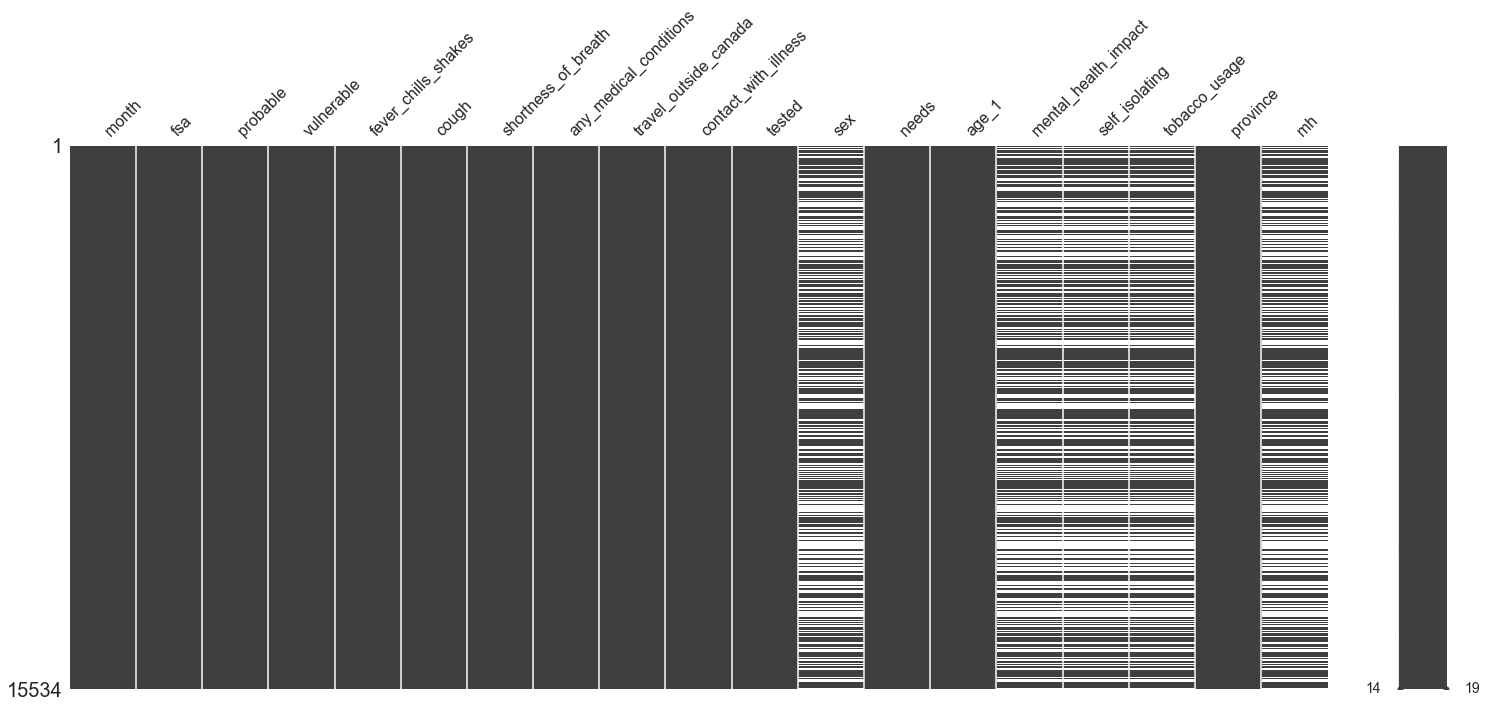

In [27]:
msno.matrix(df1)

In [28]:
df2=df1.dropna(subset=['mental_health_impact'])

<AxesSubplot:>

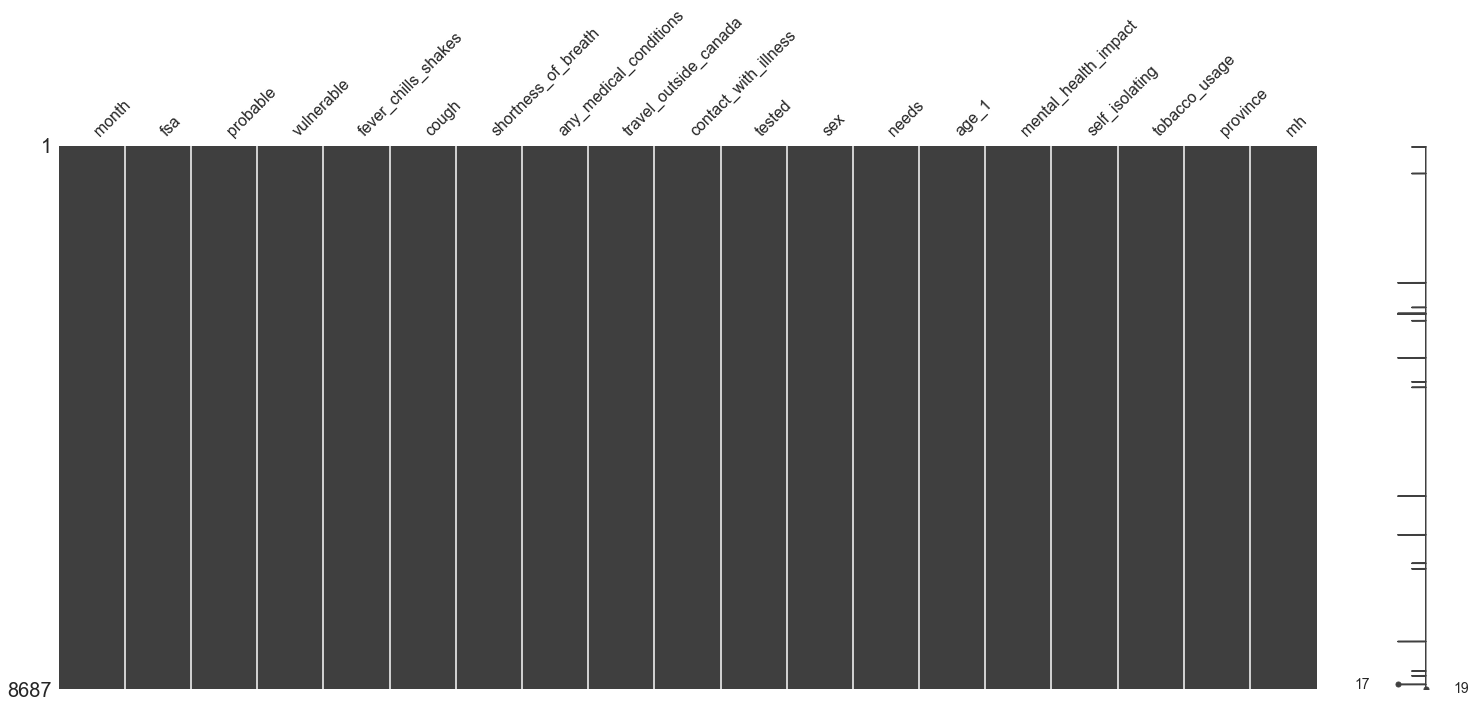

In [29]:
msno.matrix(df2)

In [30]:
percent_missing = df2.isnull().sum() * 100 / len(df)

In [31]:
print(percent_missing)

month                     0.000000
fsa                       0.000000
probable                  0.000000
vulnerable                0.000000
fever_chills_shakes       0.000000
cough                     0.000000
shortness_of_breath       0.000000
any_medical_conditions    0.000000
travel_outside_canada     0.000000
contact_with_illness      0.000000
tested                    0.000000
sex                       0.057937
needs                     0.000000
age_1                     0.000000
mental_health_impact      0.000000
self_isolating            0.051500
tobacco_usage             0.057937
province                  0.000000
mh                        0.000000
dtype: float64


In [32]:
df4=df2.drop(columns=['month', 'fsa', 'probable','vulnerable','fever_chills_shakes','cough',
                      'shortness_of_breath','any_medical_conditions','travel_outside_canada', 'contact_with_illness',
                      'tested', 'needs', 'age_1', 'mental_health_impact', 'province'  ])

# Preprocessing

In [33]:
from sklearn.impute import KNNImputer

In [34]:
df2 = df2.fillna(np.nan)

In [35]:
df2.duplicated()

1        False
5        False
6        False
10       False
11       False
         ...  
15525    False
15526    False
15527    False
15532    False
15533     True
Length: 8687, dtype: bool

In [36]:
df2 = df2.replace(to_replace='na', value=np.nan)

In [37]:
df4['sex'] = df4['sex'].map(
                   {'f':0 ,'m':1})

In [38]:
df4['self_isolating'] = df4['self_isolating'].map(
                   {'y':1 ,'n':0})

In [39]:
df4['tobacco_usage'] = df4['tobacco_usage'].map(
                   {'y':2, 'quitSmoking': 1 ,'n':0})

In [40]:
df4

,sex,self_isolating,tobacco_usage,mh
1,0.0,1.0,0.0,1.0
5,0.0,1.0,1.0,1.0
6,0.0,1.0,0.0,0.0
10,NaN,1.0,2.0,1.0
11,0.0,1.0,0.0,1.0
...,...,...,...,...
15525,0.0,0.0,0.0,0.0
15526,0.0,0.0,0.0,1.0
15527,0.0,0.0,2.0,0.0
15532,1.0,0.0,0.0,1.0


In [41]:
df4 = df4.loc[:,['mh','sex','self_isolating', 'tobacco_usage']]

In [42]:
cat_dummies = pd.get_dummies(df4, columns=['sex', 'mh', 'self_isolating', 'tobacco_usage'], drop_first = True)
cat_dummies.head(15533)

,sex_1.0,mh_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
1,0,1,1,0,0
5,0,1,1,1,0
6,0,0,1,0,0
10,0,1,1,0,1
11,0,1,1,0,0
...,...,...,...,...,...
15525,0,0,0,0,0
15526,0,1,0,0,0
15527,0,0,0,0,1
15532,1,1,0,0,0


In [43]:
df4 = df4.drop(['mh', 'sex', 'self_isolating', 'tobacco_usage'], axis=1)
df4 = pd.concat([df4, cat_dummies], axis=1)

In [44]:
df4

,sex_1.0,mh_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
1,0,1,1,0,0
5,0,1,1,1,0
6,0,0,1,0,0
10,0,1,1,0,1
11,0,1,1,0,0
...,...,...,...,...,...
15525,0,0,0,0,0
15526,0,1,0,0,0
15527,0,0,0,0,1
15532,1,1,0,0,0


In [2]:
from sklearn.impute import KNNImputer

In [1]:
imputer = KNNImputer(n_neighbors=5)
df4 = pd.DataFrame(imputer.fit_transform(df4),columns = df4.columns)

NameError: name 'KNNImputer' is not defined

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4 = pd.DataFrame(scaler.fit_transform(df4), columns = df4.columns)
df4.head()

,sex_1.0,mh_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0


In [47]:
df4

,sex_1.0,mh_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
8682,0.0,0.0,0.0,0.0,0.0
8683,0.0,1.0,0.0,0.0,0.0
8684,0.0,0.0,0.0,0.0,1.0
8685,1.0,1.0,0.0,0.0,0.0


In [48]:
df4.isna().any()

sex_1.0               False
mh_1.0                False
self_isolating_1.0    False
tobacco_usage_1.0     False
tobacco_usage_2.0     False
dtype: bool

In [49]:
df2 = df2.reset_index()

In [50]:
df2[[ 'sex_1.0', 'mh_1.0', 'self_isolating_1.0', 'tobacco_usage_1.0','tobacco_usage_2.0' ]] = df4[['sex_1.0', 'mh_1.0', 'self_isolating_1.0', 'tobacco_usage_1.0','tobacco_usage_2.0' ]].astype(float)

In [51]:
df2 = df2.drop('tobacco_usage', axis=1)

In [52]:
df2

,index,month,fsa,probable,vulnerable,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,...,age_1,mental_health_impact,self_isolating,province,mh,sex_1.0,mh_1.0,self_isolating_1.0,tobacco_usage_1.0,tobacco_usage_2.0
0,1,April,M9P,n,n,n,n,n,y,n,...,<26,noImpact,y,M,1.0,0.0,1.0,1.0,0.0,0.0
1,5,April,M6S,n,n,n,n,n,y,n,...,26-44,noImpact,y,M,1.0,0.0,1.0,1.0,1.0,0.0
2,6,April,M4J,n,n,n,n,n,y,n,...,45-64,negatively,y,M,0.0,0.0,0.0,1.0,0.0,0.0
3,10,April,L1V,n,n,n,n,n,y,n,...,45-64,positively,y,L,1.0,0.0,1.0,1.0,0.0,1.0
4,11,April,N0G,n,n,n,n,n,y,n,...,45-64,noImpact,y,N,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8682,15525,July,K9H,n,y,n,n,n,y,n,...,<26,negatively,n,K,0.0,0.0,0.0,0.0,0.0,0.0
8683,15526,July,M6K,n,n,n,n,n,y,n,...,45-64,noImpact,n,M,1.0,0.0,1.0,0.0,0.0,0.0
8684,15527,July,N1H,n,n,n,n,n,y,n,...,26-44,negatively,n,N,0.0,0.0,0.0,0.0,0.0,1.0
8685,15532,July,M6P,n,y,n,n,n,y,n,...,>65,noImpact,n,M,1.0,1.0,1.0,0.0,0.0,0.0


In [53]:
df2 = df2.drop('mh_1.0', axis=1)

In [54]:
df2['probable'] = df['probable'].map({'n':0 ,'y':1 })

In [55]:
df2['vulnerable'] = df['vulnerable'].map(
                   {'n':0 ,'y':1 })

In [56]:
df2['fever_chills_shakes'] = df['fever_chills_shakes'].map(
                   {'n':0 ,'y':1 })

In [57]:
df2['cough'] = df['cough'].map(
                   {'n':0 ,'y':1 })

In [58]:
df2['shortness_of_breath'] = df['shortness_of_breath'].map(
                   {'n':0 ,'y':1 })

In [59]:
df2['any_medical_conditions'] = df['any_medical_conditions'].map(
                   {'n':0 ,'y':1 })

In [60]:
df2['travel_outside_canada'] = df['travel_outside_canada'].map({'n':0 ,'y':1 })

In [61]:
df2['contact_with_illness'] = df['contact_with_illness'].map({'n':0 ,'y':1 })

In [62]:
df2['tested'] = df['tested'].map({'n':0 ,'y':1 })

In [63]:
df2['province'] = df['province'].map({'M':0 ,'L':1 ,'N':2 ,'K':3 ,'P' :4 })

In [64]:
df2['needs'] = df['needs'].map({'food':0 ,'noneOfTheAbove':1 ,'emotionalSupport':2 ,'other':3 ,'financialSupport' :4,'medication':5 })

In [65]:
X = df2[[ 'probable', 'vulnerable', 'any_medical_conditions', 'travel_outside_canada', 'tested', 'sex_1.0', 'self_isolating_1.0', ]]
y = df2['mh']

# Converting Data to Array Form For Random_Forest

In [66]:
# Use numpy to convert to arrays
import numpy as np
# Saving feature names for later use
feature_list = list(df2.columns)

In [67]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [68]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6515, 7)
Training Labels Shape: (6515,)
Testing Features Shape: (2172, 7)
Testing Labels Shape: (2172,)


In [69]:
train_features

,probable,vulnerable,any_medical_conditions,travel_outside_canada,tested,sex_1.0,self_isolating_1.0
7857,0,0,1,0,0,0.0,0.0
7778,0,0,1,0,0,0.0,0.0
478,0,0,1,0,0,0.0,1.0
1352,0,0,1,0,0,0.0,1.0
4372,0,0,1,0,0,0.0,1.0
...,...,...,...,...,...,...,...
5734,0,1,1,0,0,0.0,1.0
5191,0,0,1,0,0,1.0,0.0
5390,0,0,1,0,0,0.0,0.0
860,0,0,1,0,0,1.0,0.0


In [70]:
test_features

,probable,vulnerable,any_medical_conditions,travel_outside_canada,tested,sex_1.0,self_isolating_1.0
304,0,0,1,0,0,0.0,1.0
6349,0,0,1,0,0,0.0,1.0
8419,0,0,1,0,0,0.0,1.0
1670,0,0,1,0,0,0.0,1.0
6214,0,0,1,0,0,0.0,1.0
...,...,...,...,...,...,...,...
6529,0,0,1,0,0,0.0,1.0
4108,0,0,1,0,0,1.0,0.0
7757,0,0,1,0,0,0.0,1.0
3728,0,0,1,0,0,0.0,1.0


In [71]:
train_labels

7857    1.0
7778    1.0
478     1.0
1352    1.0
4372    0.0
       ... 
5734    0.0
5191    1.0
5390    0.0
860     0.0
7270    1.0
Name: mh, Length: 6515, dtype: float64

# Train Test Split and Undersampling

In [72]:
!pip install imbalanced-learn

In [73]:
from imblearn.under_sampling import RandomUnderSampler

In [74]:
#define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')


In [75]:
X_over, y_over = undersample.fit_resample(X, y)

In [76]:
X_over

,probable,vulnerable,any_medical_conditions,travel_outside_canada,tested,sex_1.0,self_isolating_1.0
0,0,0,1,0,0,0.0,0.0
1,0,0,1,0,0,1.0,1.0
2,0,1,1,0,0,0.0,1.0
3,0,0,1,0,0,0.0,1.0
4,0,0,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...
8535,0,0,1,0,0,0.0,1.0
8536,0,0,1,0,0,1.0,1.0
8537,0,1,1,0,0,1.0,0.0
8538,0,1,1,0,0,0.0,0.0


In [77]:
y_over

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8535    1.0
8536    1.0
8537    1.0
8538    1.0
8539    1.0
Name: mh, Length: 8540, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.2,random_state = 42)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0.0: 3421, 1.0: 3411})
Testing target statistics: Counter({1.0: 859, 0.0: 849})


In [79]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# K-Fold Cross Validation

In [128]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [   0    1    2 ... 8683 8685 8686] Validation: [  10   14   16 ... 8679 8680 8684]


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            8674, 8675, 8676, 8677, 8678, 8681, 8682, 8683, 8685, 8686],\n           dtype='int64', length=6949)] are in the [columns]"

# Standard Scaling and Logistic Regression

In [91]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
  
print (xtrain[0:10, :])

[[-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415 -0.75082925
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415  1.33186074
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415 -0.75082925
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415 -0.75082925
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415 -0.75082925
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415  1.33186074
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415  1.33186074
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415 -0.75082925
   0.50949683]
 [-0.12063588  2.10188541  0.         -0.04531433 -0.12968415 -0.75082925
   0.50949683]
 [-0.12063588 -0.47576333  0.         -0.04531433 -0.12968415 -0.75082925
  -1.96272075]]


In [92]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[600 249]
 [519 340]]


In [95]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.536     0.707     0.610       849
         1.0      0.577     0.396     0.470       859

    accuracy                          0.550      1708
   macro avg      0.557     0.551     0.540      1708
weighted avg      0.557     0.550     0.539      1708



# KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [181]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5392271662763466


In [182]:
from sklearn.metrics import confusion_matrix

In [183]:
confusion_matrix(y_test, y_pred)

array([[435, 414],
       [373, 486]])

In [184]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

#metrics:
print({"Accuracy":Accuracy,"Precision":Precision,"F1_score":F1_score})

{'Accuracy': 0.5392271662763466, 'Precision': 0.54, 'F1_score': 0.5525866969869243}


In [185]:
Precision = metrics.precision_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [186]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.538     0.512     0.525       849
         1.0      0.540     0.566     0.553       859

    accuracy                          0.539      1708
   macro avg      0.539     0.539     0.539      1708
weighted avg      0.539     0.539     0.539      1708



# Random_Forest

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
from sklearn import metrics

In [82]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [83]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.44 degrees.


In [84]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
y_test

array([1., 0., 1., ..., 1., 0., 1.])

In [86]:
errors

array([1., 0., 1., ..., 1., 0., 1.])

In [87]:
y_test

array([1., 0., 1., ..., 1., 0., 1.])

In [88]:
confusion_matrix(y_test, predictions,  labels = [0,1])

array([[605, 244],
       [516, 343]])

In [89]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.540     0.713     0.614       849
         1.0      0.584     0.399     0.474       859

    accuracy                          0.555      1708
   macro avg      0.562     0.556     0.544      1708
weighted avg      0.562     0.555     0.544      1708



In [90]:
!pip install sklearn-evaluation

In [239]:

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn_evaluation import plot

X, y = datasets.make_classification(200, 10, n_informative=5, class_sep=0.65)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


target_names = ["Not spam", "Spam"]

cr_rf = plot.ClassificationReport.from_raw_data(
    y_test, predictions, target_names=target_names
)
cr_lr = plot.ClassificationReport.from_raw_data(
    y_test, predictions, target_names=target_names
)
# display one of the classification reports
cr_rf

ValueError: Found input variables with inconsistent numbers of samples: [60, 1708]
If you need help solving this issue, send us a message: https://ploomber.io/community

In [179]:
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: fever_chills_shakes  Importance: 0.77
Variable: index                Importance: 0.05
Variable: month                Importance: 0.05
Variable: vulnerable           Importance: 0.05
Variable: cough                Importance: 0.05
Variable: probable             Importance: 0.02
Variable: fsa                  Importance: 0.0


In [187]:
# Number of trees in random forest
n_estimators = np.linspace(2500,3000, 100, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [ 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

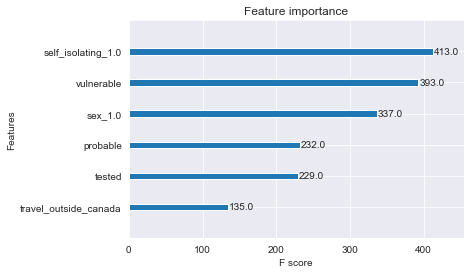

Accuracy: 56.38%
Thresh=0.000, n=7, Accuracy: 56.38%
Thresh=0.020, n=6, Accuracy: 56.38%
Thresh=0.025, n=5, Accuracy: 55.97%
Thresh=0.040, n=4, Accuracy: 56.09%
Thresh=0.048, n=3, Accuracy: 56.21%
Thresh=0.057, n=2, Accuracy: 56.21%
Thresh=0.809, n=1, Accuracy: 56.21%
              precision    recall  f1-score   support

         0.0       0.54      0.73      0.62       849
         1.0       0.60      0.40      0.48       859

    accuracy                           0.56      1708
   macro avg       0.57      0.56      0.55      1708
weighted avg       0.57      0.56      0.55      1708



In [197]:
# plot feature importance using built-in function
!pip install xgboost
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
print(classification_report(y_test, predictions))

In [154]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 5, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([2500, 2505, 2510, 2515, 2520, 2525, 2530, 2535, 2540, 2545, 2550,
       2555, 2560, 2565, 2570, 2575, 2580, 2585, 25...
       2666, 2671, 2676, 2681, 2686, 2691, 2696, 2702, 2707, 2712, 2717,
       2722, 2727, 2732, 2737, 2742, 2747, 2752, 2757, 2762, 2767, 2772,
       2777, 2782, 2787, 2792, 2797, 2803, 2808, 2813, 2818, 2823, 2828,
       2833, 2838, 2843, 2848, 2853, 2858, 2863, 2868, 2873, 2878, 2883,
       2888, 2893, 2898, 2904, 2909, 2914, 2919, 2924, 2929, 2934, 2939,
       2944,

In [155]:
rf_random.best_params_

{'n_estimators': 2803,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 1,
 'criterion': 'gini',
 'bootstrap': True}

In [156]:
print (rf_random.score(X_train, y_train))
print(rf_random.score(X_test, y_test))

0.5787470725995316
0.560304449648712


In [157]:
param_grid = {
    'n_estimators': np.linspace(2100, 2300, 5, dtype = int),
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [161]:
from sklearn.model_selection import GridSearchCV
# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_rf_search.fit(X_train, y_train)


Fitting 2 folds for each of 360 candidates, totalling 720 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [170, 180, 190, 200, 210, 220],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([2100, 2150, 2200, 2250, 2300])},
             verbose=2)

In [162]:
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 170,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 2200}

In [163]:
print (grid_rf_search.score(X_train, y_train))
print(grid_rf_search.score(X_test, y_test))

0.5799180327868853
0.5591334894613583
[CV] END max_depth=170, min_samples_leaf=2, min_samples_split=2, n_estimators=2100; total time=   4.8s
[CV] END max_depth=170, min_samples_leaf=2, min_samples_split=2, n_estimators=2300; total time=   4.8s
[CV] END max_depth=170, min_samples_leaf=2, min_samples_split=4, n_estimators=2100; total time=   4.3s
[CV] END max_depth=170, min_samples_leaf=2, min_samples_split=4, n_estimators=2200; total time=   4.6s
[CV] END max_depth=170, min_samples_leaf=3, min_samples_split=2, n_estimators=2150; total time=   4.6s
[CV] END max_depth=170, min_samples_leaf=3, min_samples_split=3, n_estimators=2100; total time=   3.9s
[CV] END max_depth=170, min_samples_leaf=3, min_samples_split=3, n_estimators=2300; total time=   4.3s
[CV] END max_depth=170, min_samples_leaf=3, min_samples_split=4, n_estimators=2250; total time=   4.2s
[CV] END max_depth=170, min_samples_leaf=4, min_samples_split=2, n_estimators=2200; total time=   4.1s
[CV] END max_depth=170, min_samples

# Multivariate Logistic Regression

In [164]:
model = sm.GLM.from_formula("mh ~ travel_outside_canada + cough + sex_1 + self_isolating_1 + tobacco_usage_1 + tobacco_usage_2", data=df2)
result = model.fit()
result.summary() 

PatsyError: Error evaluating factor: NameError: name 'tobacco_usage_1' is not defined
    mh ~ travel_outside_canada + cough + sex_1 + self_isolating_1 + tobacco_usage_1 + tobacco_usage_2
                                                                    ^^^^^^^^^^^^^^^

In [ ]:
df2

In [165]:
df2 = df2.rename(columns={"sex_1.0": "sex_1", 
                    "self_isolating_1.0": "self_isolating_1",
                    "tobacco_usage_1.0": "tobacco_usage_1",
                    "tobacco_usage_2.0": "tobacco_usage_2"})
